In [1]:
# Import libraries
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import helper
from itertools import product

In [2]:
# Load retention time data
tdata = pd.read_csv("../retention.min.csv.gz")

# Time point
timept = 10000

# Max
MIN = 0
MAX = 60

In [3]:
# Get PBA allocations
pba_allocations_bpc = {1: set(), 2: set()}
for gamma in np.arange(0, 0.0061, 0.0002):
    print("gamma =", gamma)
    lvlcands = {}
    for (lower, upper), d in tdata[(tdata["timept"] == timept) & (tdata["lower"] <= MAX) & (tdata["upper"] >= MIN) & (tdata["upper"] < 64)].groupby(["lower","upper"]):
        lvlcand = d.mean()[["timept","lower","upper","width","successes","failures","reads","sets","resets","cycles","read_bits","set_bits","reset_bits","lvl","time"]].to_dict()
        lvl, cdf = sorted(d["lvl"].values), np.linspace(0.5/len(d), 1-0.5/len(d), len(d)) # symmetric percentile CDF (https://math.stackexchange.com/questions/33488/how-to-calculate-percentile-is-it-possible-to-get-100-percentile)
        try:
            lvlcand["lower_rd"] = int(np.floor(helper.intersection(np.array([0,64]), np.array([gamma,gamma]), np.array(lvl), cdf)[0][0]))
            lvlcand["upper_rd"] = int(np.ceil(helper.intersection(np.array([0,64]), np.array([1-gamma,1-gamma]), np.array(lvl), cdf)[0][0]))
        except IndexError:
            lvlcand["lower_rd"] = min(lvl)
            lvlcand["upper_rd"] = max(lvl)
        lvlcands[(int(lower), int(upper))] = lvlcand

    pba_allocations = []
    cur_upper = -1
    while True:
        cands = [lvlcand for lvlcand in lvlcands.values() if lvlcand["lower_rd"] > cur_upper]
        if cands == []:
            break
        next_cur_upper = min([cand["upper_rd"] for cand in cands])
        pba_allocations.append([(int(cand["lower"]), int(cand["upper"])) for cand in cands if cand["upper_rd"] == next_cur_upper])
        cur_upper = next_cur_upper
    print(pba_allocations)
    if len(pba_allocations) >= 2:
        pba_allocations_bpc[1].update(product(*pba_allocations[:2]))
    if len(pba_allocations) >= 4:
        pba_allocations_bpc[2].update(product(*pba_allocations[:4]))
pba_allocations_bpc

gamma = 0.0
[[(3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(36, 44), (37, 41), (38, 41), (38, 44), (39, 42)], [(55, 58)]]
gamma = 0.0002
[[(3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(36, 44), (37, 41), (38, 41), (38, 44), (39, 42)], [(55, 58)]]
gamma = 0.0004
[[(3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(36, 44), (37, 41), (38, 41), (38, 44), (39, 42)], [(55, 58)]]
gamma = 0.0006000000000000001
[[(3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(36, 44), (37, 41), (38, 41), (38, 44), (39, 42)], [(55, 58)]]
gamma = 0.0008
[[(3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(37, 41)], [(55, 58)]]
gamma = 0.001
[[(1, 7), (3, 7), (3, 9), (4, 7), (5, 9), (6, 8)], [(37, 41)], [(55, 57)]]
gamma = 0.0012000000000000001
[[(1, 7), (6, 8)], [(35, 42), (37, 41)], [(53, 57), (53, 58), (55, 57)]]
gamma = 0.0014
[[(1, 7), (6, 8)], [(35, 41), (35, 42), (37, 41)], [(53, 57), (53, 58), (55, 57)]]
gamma = 0.0016
[[(1, 7), (6, 8)], [(34, 41), (35, 41), (35, 42), (37, 41)], [(53, 57), (53, 58), (55, 57)]]
gamma = 0.0018000000

{1: {((1, 7), (29, 36)),
  ((1, 7), (30, 38)),
  ((1, 7), (31, 38)),
  ((1, 7), (32, 38)),
  ((1, 7), (32, 39)),
  ((1, 7), (32, 41)),
  ((1, 7), (33, 38)),
  ((1, 7), (33, 39)),
  ((1, 7), (33, 40)),
  ((1, 7), (34, 38)),
  ((1, 7), (34, 39)),
  ((1, 7), (34, 40)),
  ((1, 7), (34, 41)),
  ((1, 7), (35, 41)),
  ((1, 7), (35, 42)),
  ((1, 7), (37, 41)),
  ((3, 7), (36, 44)),
  ((3, 7), (37, 41)),
  ((3, 7), (38, 41)),
  ((3, 7), (38, 44)),
  ((3, 7), (39, 42)),
  ((3, 9), (36, 44)),
  ((3, 9), (37, 41)),
  ((3, 9), (38, 41)),
  ((3, 9), (38, 44)),
  ((3, 9), (39, 42)),
  ((4, 7), (32, 39)),
  ((4, 7), (32, 41)),
  ((4, 7), (33, 39)),
  ((4, 7), (33, 40)),
  ((4, 7), (34, 39)),
  ((4, 7), (34, 40)),
  ((4, 7), (34, 41)),
  ((4, 7), (36, 44)),
  ((4, 7), (37, 41)),
  ((4, 7), (38, 41)),
  ((4, 7), (38, 44)),
  ((4, 7), (39, 42)),
  ((5, 7), (29, 36)),
  ((5, 7), (30, 38)),
  ((5, 7), (31, 38)),
  ((5, 7), (32, 38)),
  ((5, 7), (32, 39)),
  ((5, 7), (32, 41)),
  ((5, 7), (33, 38)),
  ((5, 

In [4]:
# Digraph
DG = nx.DiGraph()
DG.add_nodes_from(lvlcands.items())
DG.add_edges_from([(cand1, cand2) for cand1 in lvlcands for cand2 in lvlcands if lvlcands[cand2]["lower_rd"] > lvlcands[cand1]["upper_rd"]])
DG.number_of_nodes(), DG.number_of_edges()

(1952, 159281)

In [5]:
# Get all possible level allocations
allocations = []
for root in [(i,j) for i in range(7) for j in range(MIN,64)]:
  for leaf in [(k,l) for k in range(root[1],MAX+1) for l in range(MAX+1,64)]:
    print("ROOT", root, "LEAF", leaf)
    try:
      for path in nx.all_simple_paths(DG, root, leaf):
        allocations.append(tuple(path))  
    except nx.NodeNotFound:
       pass
len(allocations)

ROOT (0, 0) LEAF (0, 61)
ROOT (0, 0) LEAF (0, 62)
ROOT (0, 0) LEAF (1, 61)
ROOT (0, 0) LEAF (1, 62)
ROOT (0, 0) LEAF (2, 61)
ROOT (0, 0) LEAF (2, 62)
ROOT (0, 0) LEAF (3, 61)
ROOT (0, 0) LEAF (3, 62)
ROOT (0, 0) LEAF (4, 61)
ROOT (0, 0) LEAF (4, 62)
ROOT (0, 0) LEAF (5, 61)
ROOT (0, 0) LEAF (5, 62)
ROOT (0, 0) LEAF (6, 61)
ROOT (0, 0) LEAF (6, 62)
ROOT (0, 0) LEAF (7, 61)
ROOT (0, 0) LEAF (7, 62)
ROOT (0, 0) LEAF (8, 61)
ROOT (0, 0) LEAF (8, 62)
ROOT (0, 0) LEAF (9, 61)
ROOT (0, 0) LEAF (9, 62)
ROOT (0, 0) LEAF (10, 61)
ROOT (0, 0) LEAF (10, 62)
ROOT (0, 0) LEAF (11, 61)
ROOT (0, 0) LEAF (11, 62)
ROOT (0, 0) LEAF (12, 61)
ROOT (0, 0) LEAF (12, 62)
ROOT (0, 0) LEAF (13, 61)
ROOT (0, 0) LEAF (13, 62)
ROOT (0, 0) LEAF (14, 61)
ROOT (0, 0) LEAF (14, 62)
ROOT (0, 0) LEAF (15, 61)
ROOT (0, 0) LEAF (15, 62)
ROOT (0, 0) LEAF (16, 61)
ROOT (0, 0) LEAF (16, 62)
ROOT (0, 0) LEAF (17, 61)
ROOT (0, 0) LEAF (17, 62)
ROOT (0, 0) LEAF (18, 61)
ROOT (0, 0) LEAF (18, 62)
ROOT (0, 0) LEAF (19, 61)
ROOT (

133401

In [6]:
# Get all 1-2 bpc allocations
allocations_bpc = {1 : [a for a in allocations if len(a) == 2], 2 : [a for a in allocations if len(a) == 4]}
{k : len(v) for k, v in allocations_bpc.items()}

{1: 11139, 2: 71}

In [7]:
# Plot BW-BER tradeoff in level allocations
results = []
for bpc in range(2, 3):
    for i, a in enumerate(allocations_bpc[bpc] + list(pba_allocations_bpc[bpc])):
        if i % 10 == 0:
            print(bpc, i)

        rdbounds = [0]
        for lvl1, lvl2 in zip(a[:-1], a[1:]):
            rdbounds.append(int((lvlcands[lvl1]["upper_rd"] + lvlcands[lvl2]["lower_rd"]) // 2))
        rdbounds.append(64)

        times, confmat = [], []
        for i, lvl in enumerate(a):
            # Get the relevant data
            lvldata = tdata[(tdata["timept"] == timept) & (tdata["lower"] == lvl[0]) & (tdata["upper"] == lvl[1])]

            # Compute average time to target level
            times.append(lvldata["cycles"].mean() * 10e-9)

            # Compute the CER for level
            confvec = []
            for rdbound_low, rdbound_high in zip(rdbounds[:-1], rdbounds[1:]):
                confvec.append(lvldata[(lvldata["lvl"] > rdbound_low) & (lvldata["lvl"] <= rdbound_high)].count()[0])
            confmat.append(confvec)
        times, confmat = np.array(times), np.array(confmat)
        
        # Compute overall results
        bw = (48 - np.genfromtxt("../settings/dead_columns.csv", delimiter=",").size) / times.mean() * bpc

        # Symbol error magnitudes
        mae = sum(abs(i - j) * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum()
        rmse = np.sqrt(sum((i - j)**2 * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum())

        # Function to get Gray code string
        getgray = lambda x : format(2**(2**bpc) + x^x//2, f"0{2**bpc-1}b")[1:]

        # Function to get Gray code error rate for each possible symbol confusion
        grayerr = np.array([[sum([int(ic != jc) for ic, jc in zip(getgray(i), getgray(j))]) for i in range(2**bpc)] for j in range(2**bpc)]) / bpc

        # BER
        ber = (grayerr * confmat).sum() / confmat.sum()

        # CER
        cer = 1 - confmat.trace() / confmat.sum()

        # Is a PBA allocation
        is_pba = a in pba_allocations_bpc[bpc]

        # Results
        results.append([bpc, a, rdbounds, confmat, bw, ber, cer, is_pba])

# Get dataframe
data = pd.DataFrame(results, columns=["bpc", "allocation", "read_bounds", "confmat", "bw", "ber", "cer", "is_pba"]).sort_values(["ber", "bw"], ascending=[True, False])
data.to_csv("../data/allocation/allocations2.csv", index=False)
data

1 0
1 10
1 20
1 30
1 40
1 50
1 60
1 70
1 80
1 90
1 100
1 110
1 120
1 130
1 140
1 150
1 160
1 170
1 180
1 190
1 200
1 210
1 220
1 230
1 240
1 250
1 260
1 270
1 280
1 290
1 300
1 310
1 320
1 330
1 340
1 350
1 360
1 370
1 380
1 390
1 400
1 410
1 420
1 430
1 440
1 450
1 460
1 470
1 480
1 490
1 500
1 510
1 520
1 530
1 540
1 550
1 560
1 570
1 580
1 590
1 600
1 610
1 620
1 630
1 640
1 650
1 660
1 670
1 680
1 690
1 700
1 710
1 720
1 730
1 740
1 750
1 760
1 770
1 780
1 790
1 800
1 810
1 820
1 830
1 840
1 850
1 860
1 870
1 880
1 890
1 900
1 910
1 920
1 930
1 940
1 950
1 960
1 970
1 980
1 990
1 1000
1 1010
1 1020
1 1030
1 1040
1 1050
1 1060
1 1070
1 1080
1 1090
1 1100
1 1110
1 1120
1 1130
1 1140
1 1150
1 1160
1 1170
1 1180
1 1190
1 1200
1 1210
1 1220
1 1230
1 1240
1 1250
1 1260
1 1270
1 1280
1 1290
1 1300
1 1310
1 1320
1 1330
1 1340
1 1350
1 1360
1 1370
1 1380
1 1390
1 1400
1 1410
1 1420
1 1430
1 1440
1 1450
1 1460
1 1470
1 1480
1 1490
1 1500
1 1510
1 1520
1 1530
1 1540
1 1550
1 1560
1 1570
1 158

,bpc,allocation,read_bounds,confmat,bw,ber,cer,is_pba
5592,1,"((3, 15), (39, 61))","[0, 21, 64]","[[1386, 0], [0, 1344]]",1.070601e+07,0.000000,0.000000,False
2365,1,"((1, 15), (39, 61))","[0, 22, 64]","[[1386, 0], [0, 1344]]",1.014299e+07,0.000000,0.000000,False
2699,1,"((1, 23), (43, 62))","[0, 29, 64]","[[1386, 0], [0, 1344]]",1.011838e+07,0.000000,0.000000,False
4249,1,"((2, 21), (43, 62))","[0, 27, 64]","[[1386, 0], [0, 1344]]",1.011838e+07,0.000000,0.000000,False
4323,1,"((2, 23), (43, 62))","[0, 29, 64]","[[1386, 0], [0, 1344]]",1.011838e+07,0.000000,0.000000,False
...,...,...,...,...,...,...,...,...
1754,1,"((1, 3), (35, 62))","[0, 19, 64]","[[1379, 7], [7, 1337]]",8.931234e+04,0.005128,0.005128,False
5020,1,"((3, 4), (35, 62))","[0, 19, 64]","[[1379, 7], [7, 1337]]",8.931234e+04,0.005128,0.005128,False
6619,1,"((4, 5), (35, 62))","[0, 19, 64]","[[1379, 7], [7, 1337]]",8.931234e+04,0.005128,0.005128,False
1941,1,"((1, 6), (59, 61))","[0, 14, 64]","[[1380, 6], [8, 1336]]",7.243834e+04,0.005128,0.005128,False


In [8]:
# Load allocations
data = pd.read_csv("../data/allocation/allocations2.csv", converters={"allocation": eval, "read_bounds": eval}).drop(columns="confmat")
data

,bpc,allocation,read_bounds,bw,ber,cer,is_pba
0,1,"((3, 15), (39, 61))","[0, 21, 64]",1.070601e+07,0.000000,0.000000,False
1,1,"((1, 15), (39, 61))","[0, 22, 64]",1.014299e+07,0.000000,0.000000,False
2,1,"((1, 23), (43, 62))","[0, 29, 64]",1.011838e+07,0.000000,0.000000,False
3,1,"((2, 21), (43, 62))","[0, 27, 64]",1.011838e+07,0.000000,0.000000,False
4,1,"((2, 23), (43, 62))","[0, 29, 64]",1.011838e+07,0.000000,0.000000,False
...,...,...,...,...,...,...,...
11305,1,"((1, 3), (35, 62))","[0, 19, 64]",8.931234e+04,0.005128,0.005128,False
11306,1,"((3, 4), (35, 62))","[0, 19, 64]",8.931234e+04,0.005128,0.005128,False
11307,1,"((4, 5), (35, 62))","[0, 19, 64]",8.931234e+04,0.005128,0.005128,False
11308,1,"((1, 6), (59, 61))","[0, 14, 64]",7.243834e+04,0.005128,0.005128,False


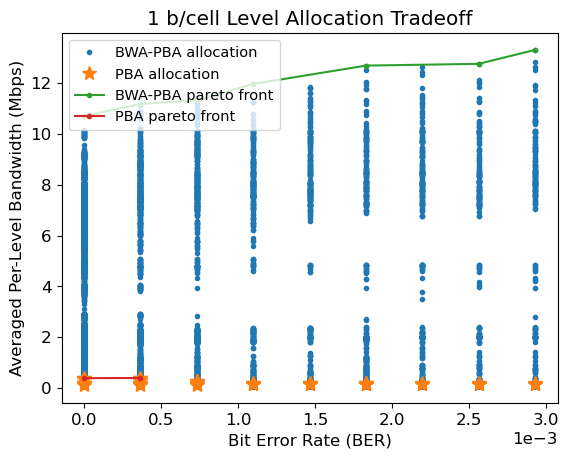

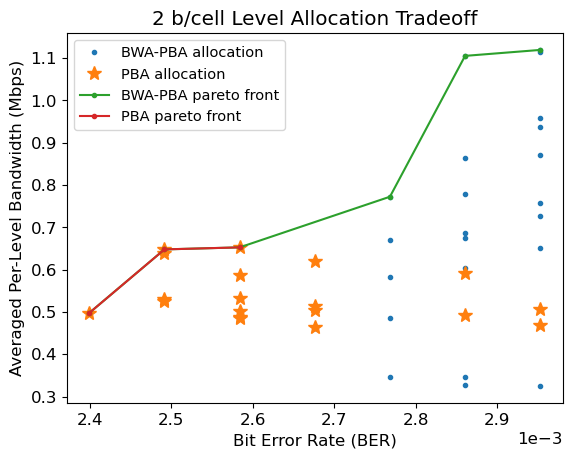

,bpc,allocation,read_bounds,bw,ber,cer,is_pba,bacc
0,1,"((3, 15), (39, 61))","[0, 21, 64]",1.070601e+07,0.000000,0.000000,False,1.000000
5446,1,"((0, 18), (39, 61))","[0, 23, 64]",1.118435e+07,0.000366,0.000366,False,0.999634
7087,1,"((3, 15), (38, 61))","[0, 20, 64]",1.133252e+07,0.000733,0.000733,False,0.999267
7991,1,"((3, 15), (37, 61))","[0, 20, 64]",1.197266e+07,0.001099,0.001099,False,0.998901
8913,1,"((3, 15), (36, 61))","[0, 19, 64]",1.269497e+07,0.001832,0.001832,False,0.998168
9833,1,"((3, 19), (37, 61))","[0, 23, 64]",1.276505e+07,0.002564,0.002564,False,0.997436
10176,1,"((2, 17), (36, 61))","[0, 20, 64]",1.331265e+07,0.002930,0.002930,False,0.997070
4400,1,"((3, 9), (38, 44))","[0, 18, 64]",3.898089e+05,0.000000,0.000000,True,1.000000
9823,2,"((5, 7), (29, 36), (49, 52), (58, 62))","[0, 12, 38, 52, 64]",4.976722e+05,0.002399,0.004799,True,0.997601
9825,2,"((6, 8), (32, 38), (49, 52), (58, 62))","[0, 13, 39, 52, 64]",6.477874e+05,0.002492,0.004983,True,0.997508


In [9]:
# Pareto curve
data["bacc"] = 1 - data["ber"]
best = []
for bpc in range(1, 3):
    data_bpc = data[(data["bpc"] == bpc) & (data["ber"] <= 3e-3)].drop_duplicates(subset=["allocation"])
    data_bpc = data_bpc.drop_duplicates(subset=["ber", "bw"])

    plt.plot(data_bpc["ber"], data_bpc["bw"] / 1e6, ".", label="BWA-PBA allocation")
    plt.plot(data_bpc[data_bpc["is_pba"]]["ber"], data_bpc[data_bpc["is_pba"]]["bw"] / 1e6, "*", markersize=10, label="PBA allocation")

    costs = data_bpc[["bacc", "bw"]].values
    unique_costs = data_bpc[["bacc", "bw"]].drop_duplicates().values #
    is_pareto = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_pareto[i] = np.all(np.any(np.delete(costs,i,axis=0)<c, axis=1))
    best.append(data_bpc[is_pareto])
    plt.plot(data_bpc[is_pareto]["ber"], data_bpc[is_pareto]["bw"] / 1e6, '.-', label="BWA-PBA pareto front")
    
    pba_data_bpc = data_bpc[data_bpc["is_pba"]]
    pba_costs = pba_data_bpc[["bacc", "bw"]].values
    pba_is_pareto = np.ones(pba_data_bpc.shape[0], dtype = bool)
    for i, c in enumerate(pba_costs):
        pba_is_pareto[i] = np.all(np.any(np.delete(pba_costs,i,axis=0)<c, axis=1))
    best.append(pba_data_bpc[pba_is_pareto & (pba_data_bpc["ber"] == 0)])
    plt.plot(pba_data_bpc[pba_is_pareto]["ber"], pba_data_bpc[pba_is_pareto]["bw"] / 1e6, '.-', label="PBA pareto front")
    
    plt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
    plt.title(f"{bpc} b/cell Level Allocation Tradeoff")
    plt.xlabel("Bit Error Rate (BER)")
    plt.ylabel("Averaged Per-Level Bandwidth (Mbps)")
    plt.legend(fontsize=10.5)
    plt.show()
best = pd.concat(best).drop_duplicates(subset=["allocation"])
best

bpc                              1
allocation     ((3, 15), (39, 61))
read_bounds            [0, 21, 64]
bw                  10706006.42667
ber                            0.0
cer                            0.0
is_pba                       False
bacc                           1.0
Name: 0, dtype: object


/home/ember/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2665: RuntimeWarning: invalid value encountered in double_scalars
  [0.0    , y_scale, (-inb*y_scale)],


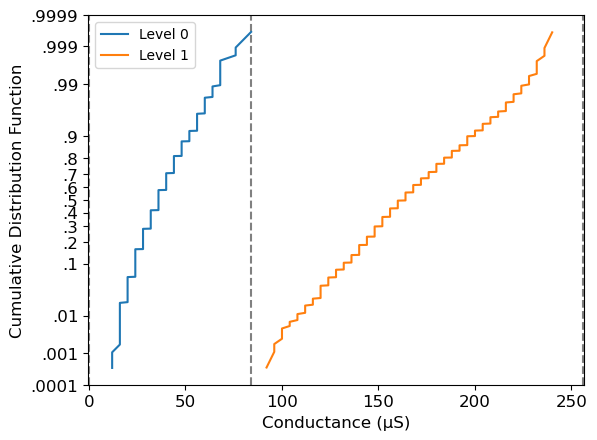

bpc                              1
allocation     ((0, 18), (39, 61))
read_bounds            [0, 23, 64]
bw                 11184345.635959
ber                       0.000366
cer                       0.000366
is_pba                       False
bacc                      0.999634
Name: 5446, dtype: object


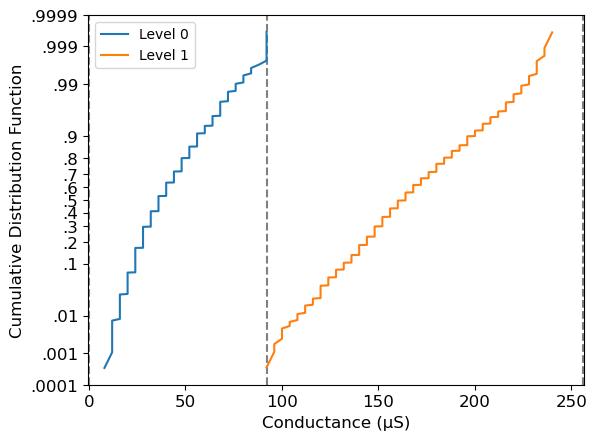

bpc                              1
allocation     ((3, 15), (38, 61))
read_bounds            [0, 20, 64]
bw                 11332518.433403
ber                       0.000733
cer                       0.000733
is_pba                       False
bacc                      0.999267
Name: 7087, dtype: object


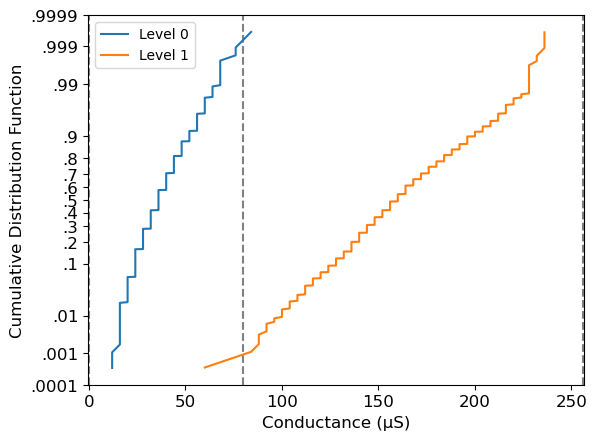

bpc                              1
allocation     ((3, 15), (37, 61))
read_bounds            [0, 20, 64]
bw                 11972656.682079
ber                       0.001099
cer                       0.001099
is_pba                       False
bacc                      0.998901
Name: 7991, dtype: object


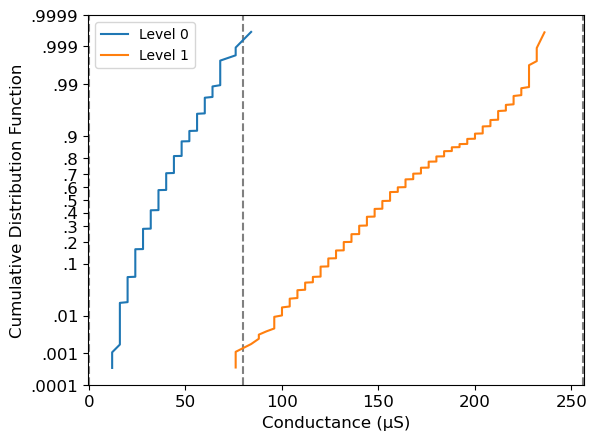

bpc                              1
allocation     ((3, 15), (36, 61))
read_bounds            [0, 19, 64]
bw                 12694968.604172
ber                       0.001832
cer                       0.001832
is_pba                       False
bacc                      0.998168
Name: 8913, dtype: object


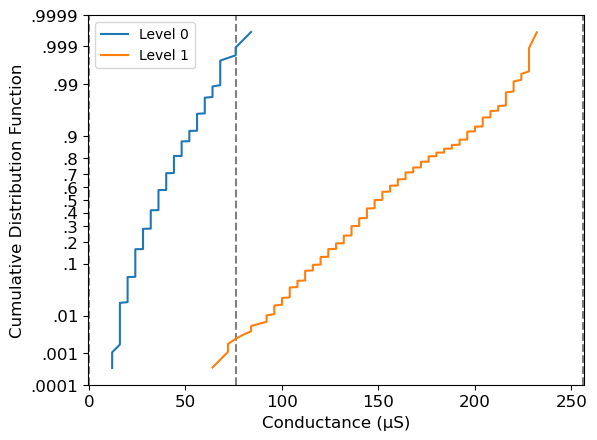

bpc                              1
allocation     ((3, 19), (37, 61))
read_bounds            [0, 23, 64]
bw                 12765054.131189
ber                       0.002564
cer                       0.002564
is_pba                       False
bacc                      0.997436
Name: 9833, dtype: object


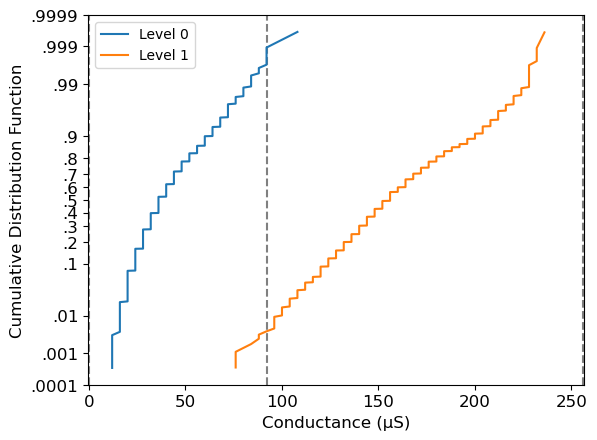

bpc                              1
allocation     ((2, 17), (36, 61))
read_bounds            [0, 20, 64]
bw                 13312650.184719
ber                        0.00293
cer                        0.00293
is_pba                       False
bacc                       0.99707
Name: 10176, dtype: object


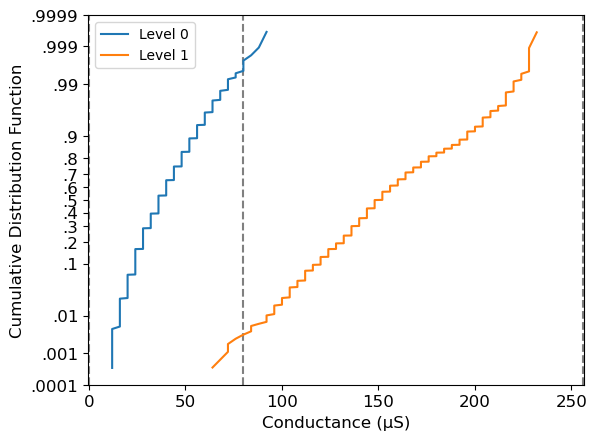

bpc                             1
allocation     ((3, 9), (38, 44))
read_bounds           [0, 18, 64]
bw                  389808.878317
ber                           0.0
cer                           0.0
is_pba                       True
bacc                          1.0
Name: 4400, dtype: object


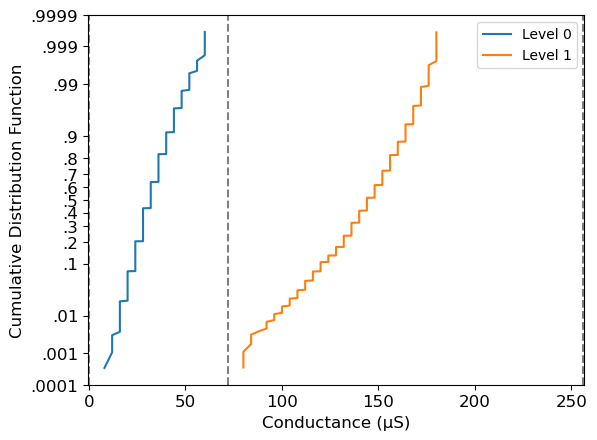

bpc                                                 2
allocation     ((5, 7), (29, 36), (49, 52), (58, 62))
read_bounds                       [0, 12, 38, 52, 64]
bw                                       497672.24772
ber                                          0.002399
cer                                          0.004799
is_pba                                           True
bacc                                         0.997601
Name: 9823, dtype: object


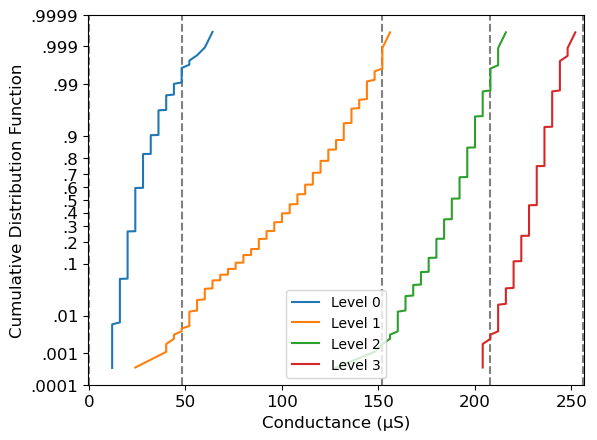

bpc                                                 2
allocation     ((6, 8), (32, 38), (49, 52), (58, 62))
read_bounds                       [0, 13, 39, 52, 64]
bw                                      647787.368913
ber                                          0.002492
cer                                          0.004983
is_pba                                           True
bacc                                         0.997508
Name: 9825, dtype: object


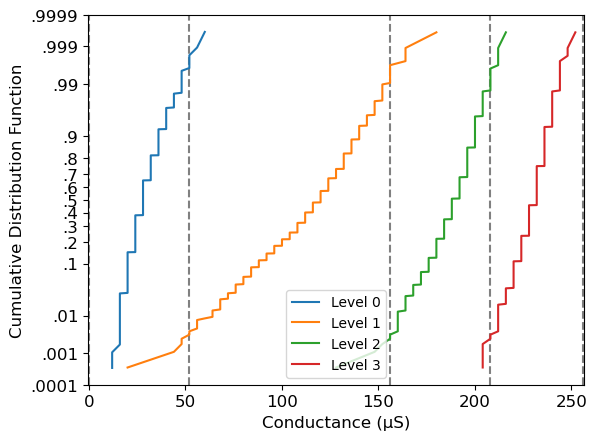

bpc                                                 2
allocation     ((6, 8), (31, 38), (49, 52), (58, 62))
read_bounds                       [0, 13, 39, 52, 64]
bw                                      652593.560492
ber                                          0.002584
cer                                          0.005168
is_pba                                           True
bacc                                         0.997416
Name: 10135, dtype: object


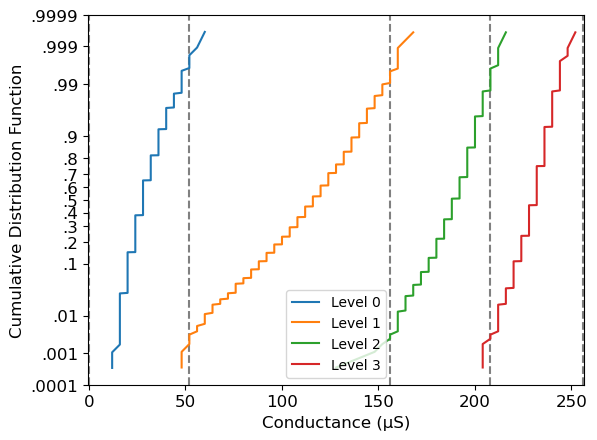

bpc                                                 2
allocation     ((2, 8), (32, 38), (49, 52), (58, 62))
read_bounds                       [0, 13, 39, 52, 64]
bw                                      772332.649163
ber                                          0.002769
cer                                          0.005537
is_pba                                          False
bacc                                         0.997231
Name: 10159, dtype: object


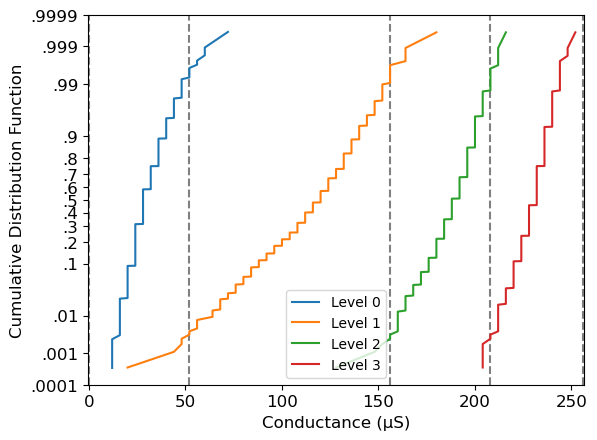

bpc                                                 2
allocation     ((5, 9), (32, 38), (49, 52), (58, 62))
read_bounds                       [0, 13, 39, 52, 64]
bw                                     1105297.727673
ber                                          0.002861
cer                                          0.005722
is_pba                                          False
bacc                                         0.997139
Name: 10164, dtype: object


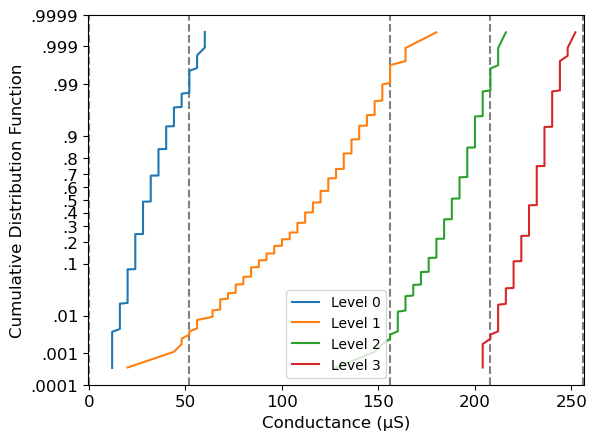

bpc                                                 2
allocation     ((5, 9), (31, 38), (49, 52), (58, 62))
read_bounds                       [0, 13, 39, 52, 64]
bw                                     1119363.915044
ber                                          0.002953
cer                                          0.005906
is_pba                                          False
bacc                                         0.997047
Name: 10430, dtype: object


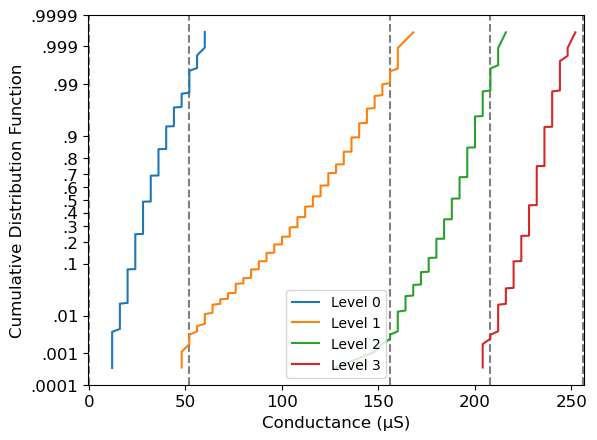

In [10]:
# Visualize allocations
for i, d in best.iterrows():
    plt.xlim(-0.5, 256.5)
    plt.gca().set_yscale("ppf")
    plt.xlabel("Conductance (µS)")
    plt.ylabel("Cumulative Distribution Function")
    print(d)
    for bound in d["read_bounds"]:
        plt.axvline(bound*4, color="gray", linestyle="--")
    for j, lvl in enumerate(d["allocation"]):
        # Get the relevant data
        lvldata = tdata[(tdata["timept"] == timept) & (tdata["lower"] == lvl[0]) & (tdata["upper"] == lvl[1])]

        # Plot distributions
        plt.plot(sorted(lvldata["lvl"].values * 4), np.linspace(0.5/len(lvldata["lvl"].values), 1-0.5/len(lvldata["lvl"].values), len(lvldata["lvl"].values)), label=f"Level {j}")
    plt.legend(fontsize=10)
    plt.show()

In [11]:
# Write out configs
import json
from copy import deepcopy
with open("../settings/config.json") as config_tmpl_file:
    config_tmpl = json.load(config_tmpl_file)

for i, d in best.iterrows():
    with open(f"../settings/opt/{d['bpc']}bpc_{'bwa' if not d['is_pba'] else 'pba'}_{i}.json", "w") as config_outfile:
        config = deepcopy(config_tmpl)
        config["num_levels"] = len(d["allocation"])
        config["level_settings"] = config["level_settings"][:config["num_levels"]]
        config["post_read_setup_cycles"] = 2
        for lvl, ((lower_write, upper_write), read_bound) in enumerate(zip(d["allocation"], d["read_bounds"][1:])):
            config["level_settings"][lvl]["adc_lower_write_ref_lvl"] = lower_write
            config["level_settings"][lvl]["adc_upper_write_ref_lvl"] = upper_write
            config["level_settings"][lvl]["adc_upper_read_ref_lvl"] = min(read_bound, 63)
        json.dump(config, config_outfile, indent=4)